**Genetic algorithm that solves the 8-Queens Problem**

The genetic algorithm evolves a population of individuals through selection, crossover, and mutation in an iterative search for solutions to the 8-Queens Problem on the chessboard where no two queens attack each other, thereby maximizing the solution's fitness.

*   Fitness Function: An individual's fitness is calculated by subtracting their maximum fitness from the total number of horizontal and diagonal clashes between queens. This fitness function determines how well an individual solution meets the constraints of the problem.
*  Population Initialization: A population of individuals is generated at random, with each representing a distinct arrangement of queens on the board. The size of the population is an important parameter that can influence the algorithm's performance.
*   Selection: Parents are chosen from the population based on their fitness. A selection mechanism, such as proportional selection, is utilized to select fitter candidates. This ensures that better solutions are more likely to be reproduced.
*   Crossover: Two parents are chosen, and a random crossover point is determined. The parents' genes are then combined at the crossover point, resulting in two offspring. Crossover aids in exploring the solution space and, potentially, developing better solutions.
*   Mutation: A small probability is assigned for mutation to occur. If a mutation occurs, the offspring's random gene is altered. Mutation adds new genetic material to the population, allowing the algorithm to explore new areas of the solution space.


10  populations
Generation - 1
[5, 8, 4, 4, 1, 6, 7, 5]  fitness= 22
[6, 1, 6, 5, 1, 6, 2, 7]  fitness= 20
[2, 8, 6, 1, 6, 3, 5, 3]  fitness= 22
[2, 2, 8, 5, 2, 3, 6, 5]  fitness= 18
[5, 5, 2, 1, 4, 3, 6, 5]  fitness= 16
[2, 2, 8, 5, 7, 3, 6, 8]  fitness= 23
[6, 7, 6, 4, 4, 6, 8, 8]  fitness= 16
[8, 1, 6, 5, 1, 6, 2, 7]  fitness= 19
[8, 8, 6, 1, 6, 3, 1, 5]  fitness= 19
Maximum fitness =  24
Generation - 2
[5, 8, 4, 4, 1, 6, 7, 8]  fitness= 19
[8, 1, 6, 5, 7, 3, 6, 8]  fitness= 19
[2, 2, 8, 5, 2, 6, 2, 7]  fitness= 19
[2, 8, 6, 1, 6, 3, 7, 5]  fitness= 22
[6, 2, 6, 8, 1, 3, 5, 3]  fitness= 24
[5, 5, 2, 1, 4, 6, 2, 7]  fitness= 21
[5, 8, 4, 4, 1, 6, 7, 3]  fitness= 23
[2, 8, 6, 1, 2, 3, 6, 5]  fitness= 18
[2, 8, 6, 1, 6, 3, 8, 8]  fitness= 19
Maximum fitness =  24
Generation - 3
[2, 8, 6, 8, 1, 3, 7, 5]  fitness= 25
[6, 2, 6, 8, 1, 3, 5, 3]  fitness= 24
[8, 1, 6, 5, 7, 3, 6, 5]  fitness= 17
[6, 2, 6, 4, 1, 6, 7, 8]  fitness= 15
[8, 1, 6, 5, 1, 3, 7, 5]  fitness= 19
[5, 5, 2, 1, 1, 6, 7,

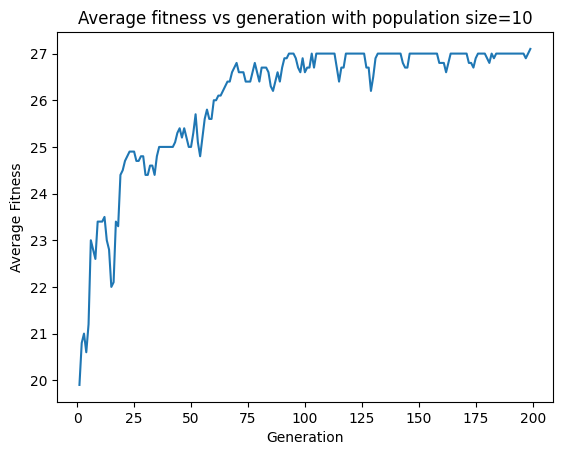

In [ ]:
from __future__ import division
import random
import matplotlib.pyplot as plt

max_fitness = 28  # Maximum amount of collisions

def fitness(individual):
    # calculates the non-attacking pair of queens
    horizontal_clashes = sum([individual.count(queen_col)-1 for queen_col in individual])/2
    diagonal_clashes = 0
    for col_count, column in enumerate(individual):
        for diag_count, diagonal in enumerate(individual):
            diff = abs(col_count - diag_count)
            if diff > 0:  # current queen is left without counting
                if diagonal + diff == column or diagonal - diff == column:
                    diagonal_clashes += 1
    diagonal_clashes /= 2  # since the diagonal collisions were counted twice
    return int(max_fitness - (horizontal_clashes + diagonal_clashes))

def generate_new_population(population):
    new_population = []
    mutation_probability = 0.03
    elitism_percentage = 0.1  # Preserve the top 10% of the population
    elites_count = int(len(population) * elitism_percentage)

    # Keep the elites in the new population without any changes
    elites = sorted(population, key=fitness, reverse=True)[:elites_count]
    new_population.extend(elites)

    # Calculate the sum of fitness for proportional selection
    sum_of_fitness = sum(fitness(individual) for individual in population)

    while len(new_population) < len(population):
        parent1 = random_choice(population, sum_of_fitness)  # Use sum of fitness for selection
        parent2 = random_choice(population, sum_of_fitness)
        child = crossover(parent1, parent2)
        if random.random() < mutation_probability:
            child = mutation(child)
        print(str(child), " fitness=", fitness(child))
        new_population.append(child)

    return new_population

def random_choice(population, sum_of_fitness):
    # Select a random value based on the sum of fitness
    random_value = random.uniform(0, sum_of_fitness)
    total = 0
    for individual in population:
        total += fitness(individual)
        if total > random_value:
            return individual

def crossover(parent1, parent2):
    crossover_point = random.randint(0, 7)  # Randomly choosing the crossover point
    child = parent1[0:crossover_point] + parent2[crossover_point:8]
    return child

def mutation(child):
    point = random.randint(0, 7)  # Choosing the queen to mutate
    mutateto = random.randint(1, 8)  # Randomly choosing the new value to be replaced
    child[point] = mutateto
    return child

def main():
    populationsize = [10]  # Testing with 10, 100 populations
    number = 1
    for ps in populationsize:
        generation = 1
        population = []  # population list
        generationlist = []  # generation list
        avg_fitness = []  # List of average fitness score of each generation
        print(ps, " populations")
        for x in range(ps):
            popu = [random.randint(1, 8) for y in range(8)]  # 8 queens are generated to form an individual
            population.append(popu)
        while not max_fitness in [fitness(i) for i in population]:  # Iteration continues until the fitness function an individual is 28
            print("Generation -", generation)
            population = generate_new_population(population)  # generating the next generation
            print("Maximum fitness = ", max([fitness(y) for y in population]))
            sof = sum(fitness(indiv) for indiv in population)  # Sum of fitness for average calculation
            avgf = sof / ps
            avg_fitness.append(avgf)
            generationlist.append(generation)
            generation += 1
        #print(avg_fitness, generationlist)
        print("Solved and the Generation=", generation - 1)
        for indiv in population:
            if fitness(indiv) == max_fitness:
                print(str(indiv), " fitness=", fitness(indiv), "populationsize=", ps)
        # Graph of Average fitness vs generation size is plotted
        plt.figure(number)
        plt.title("Average fitness vs generation with population size=%s" % ps)
        plt.plot(generationlist, avg_fitness)
        plt.xlabel("Generation")
        plt.ylabel("Average Fitness")
        number += 1
        plt.show()

if __name__ == '__main__':
    main()
